In [1]:
#Import our standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Wine Dataset
fname = "wine.csv"
df = pd.read_csv(fname) 

In [3]:
#Glimpse of data
df.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


In [4]:
#Number of Rows and Columns
df.shape

(25, 7)

In [5]:
#Check for null
df.isnull().sum()

Year           0
Price          0
WinterRain     0
AGST           0
HarvestRain    0
Age            0
FrancePop      0
dtype: int64

In [6]:
#Drop year and population
df.drop(['Year','FrancePop'], axis = 1, inplace = True)

In [7]:
#Create Independent and Dependent Variables
X = df.drop('Price', axis = 1)
y = df['Price']

In [8]:
#Load Test data as well
fname = "wine_test.csv"
df_test = pd.read_csv(fname)

In [9]:
#Check the test data
df_test

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1979,6.9541,717,16.1667,122,4,54835.832
1,1980,6.4979,578,16.0000,74,3,55110.236


In [10]:
#Drop unwanted columns
df_test.drop(['Year','FrancePop'], axis = 1, inplace = True)

In [11]:
#Split Indepndent and Dependent Variables
X_test = df_test.drop('Price', axis = 1)
y_test = df_test['Price']

## Linear Regression

In [12]:
#Load Decision Trees
from sklearn.linear_model import LinearRegression
lin_regression = LinearRegression()

In [13]:
#Train the regression with training data
lrMod = lin_regression.fit(X, y)

In [14]:
#Predict the price for test data
lrPred = lrMod.predict(X_test)
lrPred

array([6.76892463, 6.6849104 ])

In [15]:
#Check the accuracy of the model
print('training accuracy:', lrMod.score(X, y))
print('test accuracy:',lrMod.score(X_test, y_test))

training accuracy: 0.8285662193424284
test accuracy: 0.3343904702752313


# Decision Tree

In [16]:
#Load Decision Trees
from sklearn.tree import DecisionTreeRegressor,  plot_tree

In [17]:
#Create an object of Decision Tree Regressor and Fit the model
RTree = DecisionTreeRegressor(random_state = 0, max_depth = 3)
RTree.fit(X,y)

DecisionTreeRegressor(max_depth=3, random_state=0)

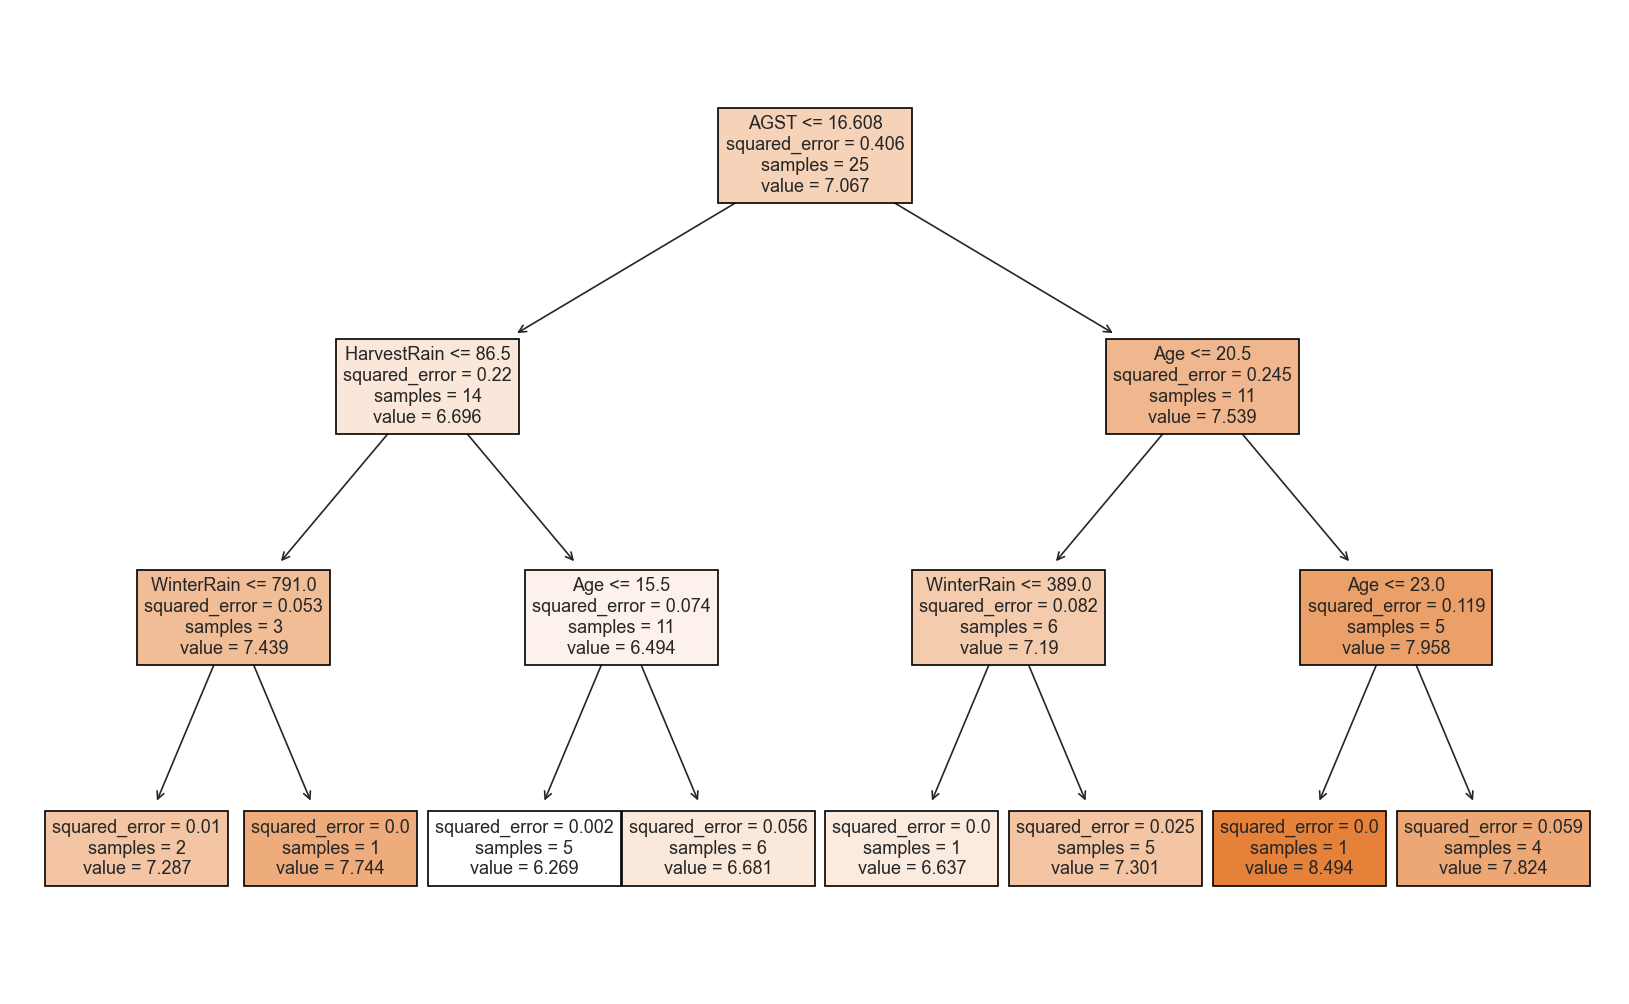

In [18]:
#Visualise the Decision Tree
plt.style.use('seaborn')
fig = plt.figure(figsize=(5,3), dpi = 400)
_ = plot_tree(RTree, 
                   feature_names=X.columns,
                   filled=True)
plt.show()

In [22]:
X_test

,WinterRain,AGST,HarvestRain,Age
0,717,16.1667,122,4
1,578,16.0000,74,3


In [20]:
#Predict the price for test data
predictions = RTree.predict(X_test)
predictions

array([6.26942, 7.287  ])

In [ ]:
import pickle

In [ ]:
y_test

In [21]:
#Check the accuracy of the model
print('training accuracy:', RTree.score(X, y))
print('test accuracy:',RTree.score(X_test, y_test))

training accuracy: 0.9277284964914225
test accuracy: -9.4888880812291


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor